<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Funcionales en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Manifold Learning</div><br>
    <div style="font-size: large">Ángela Fernández Pascual - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
                   
    .tqst {background-color: #97d0a7; padding:10px; border-radius: 5px; border: solid 2px #63BA97;}
    .tqst:before {font-weight: bold; content:"Team Exercise"; display: block; margin: 0px 10px 10px 10px;}
           
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used.

In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.datasets import make_s_curve

from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import KernelPCA

from mpl_toolkits.mplot3d import Axes3D
Axes3D
matplotlib.rc('figure', figsize=(20, 8))
my_cmap = plt.cm.Spectral

seed = 123


# Dataset

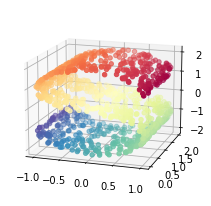

In [4]:
N = 1000
X, color = make_s_curve(N, random_state=seed)

fig = plt.figure()
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=my_cmap)
ax.view_init(15, -72)

# Comparison of different manifold learning methods

Let's try over the previous example some of the most well-known manifold learning methods, defined in *scikit-learn*.

<div class="tqst">

* Let's define a proper embedding of dimension 2 for the S curve dataset using the following methods:
    * MSD
    * Isomap
    * KPCA
    * LLE
    * LE
    * SC

* While trying these methods pay special atention to the following questions:
    * Which differences can you appreciate between embeddings?
    * Which method is the quickest and which one the slowest?
    * Which one is easiest to tune?

</div>

In [5]:
n_components = 2

## MSD

<div class="tqst">

* Define a proper embedding using MSD and plot it for this example.

</div>

In [12]:
mds = MDS(
    n_components=2,
    metric=True,
    n_init=4,
    max_iter=300,
    n_jobs=-1,
    random_state=123,
    dissimilarity="euclidean"
)

X_mds = mds.fit_transform(X)

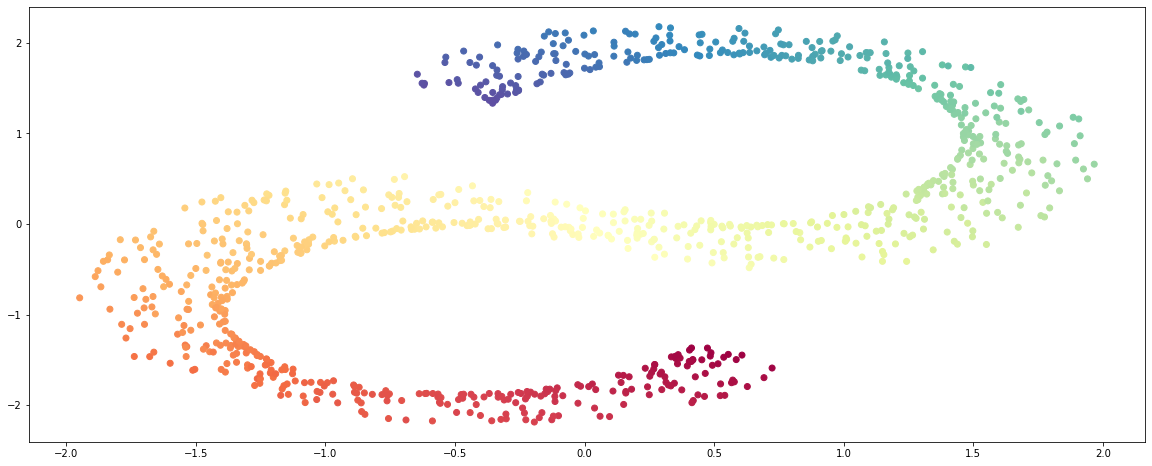

In [27]:
_ = plt.scatter(X_mds[:,0], X_mds[:,1], c=color, cmap=my_cmap)

## Isomap

<div class="tqst">

* Define a proper embedding using Isomap and plot it for this example.

</div>

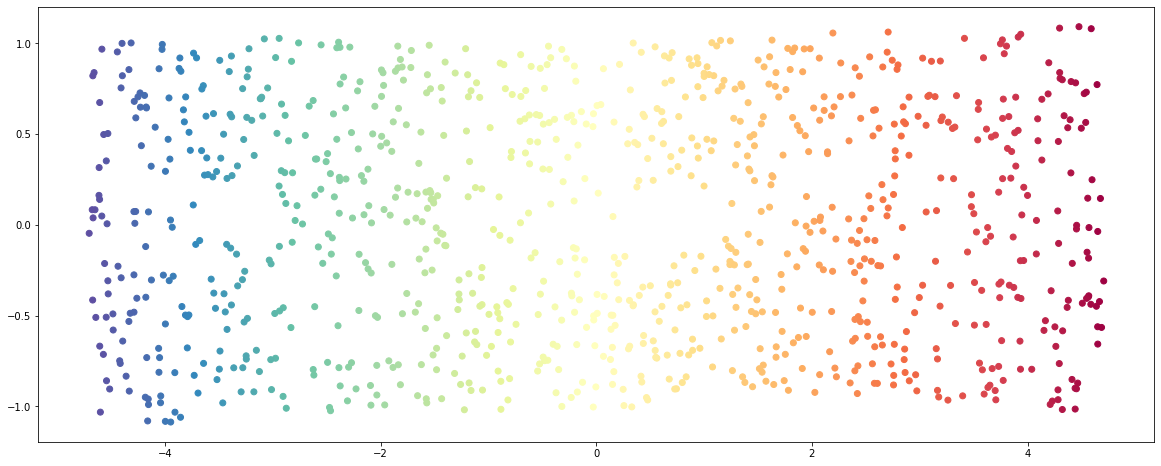

In [40]:
isomap = Isomap(
    n_components=2,
    n_neighbors=30
)

X_isomap = isomap.fit_transform(X)

_ = plt.scatter(X_isomap[:,0], X_isomap[:,1], c=color, cmap=my_cmap)

## KPCA

<div class="tqst">

* Define a proper embedding using KPCA and plot it for this example.

</div>

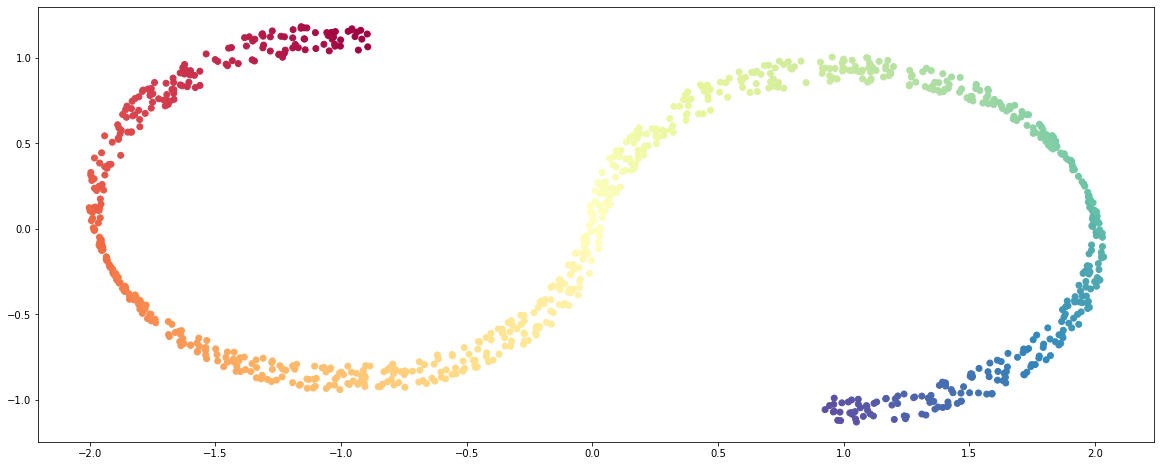

In [90]:
kpca = KernelPCA(
    n_components=2,
    kernel='linear',
    gamma=1
)

X_kpca = kpca.fit_transform(X)

_ = plt.scatter(X_kpca[:,0], X_kpca[:,1], c=color, cmap=my_cmap)

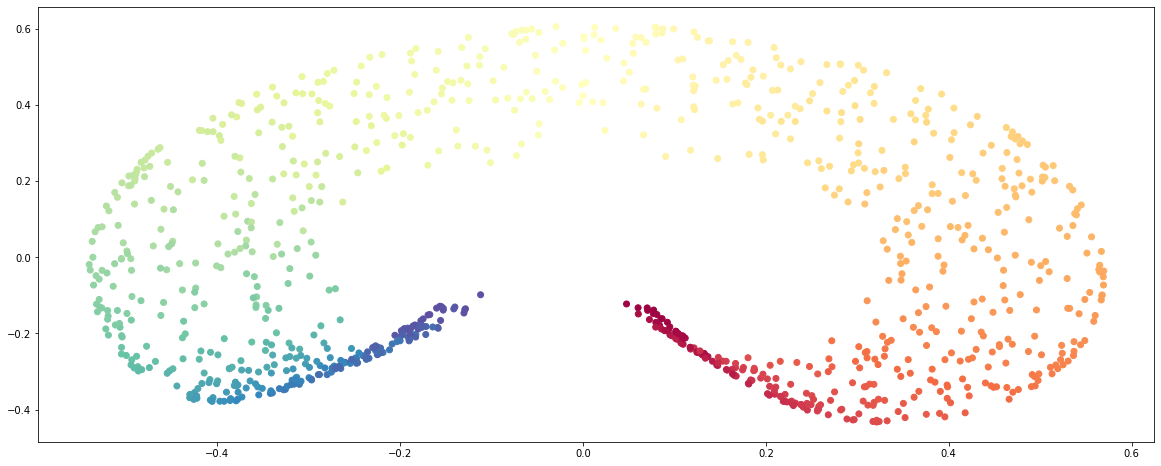

In [114]:
kpca = KernelPCA(
    n_components=2,
    kernel='rbf',
    gamma=1
)

X_kpca = kpca.fit_transform(X)

_ = plt.scatter(X_kpca[:,0], X_kpca[:,1], c=color, cmap=my_cmap)

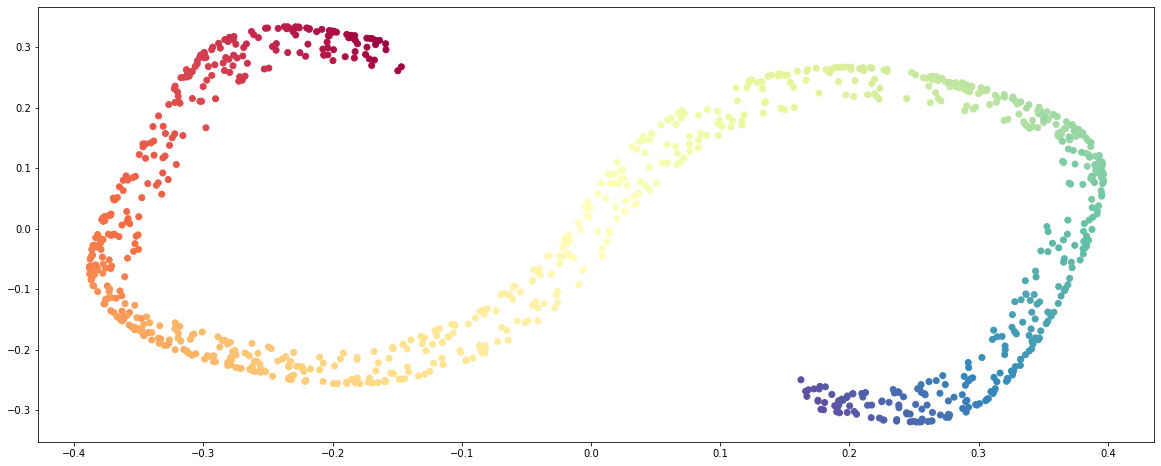

In [115]:
kpca = KernelPCA(
    n_components=2,
    kernel='laplacian',
    gamma=0.1
)

X_kpca = kpca.fit_transform(X)

_ = plt.scatter(X_kpca[:,0], X_kpca[:,1], c=color, cmap=my_cmap)

## SC

<div class="tqst">

* Define a proper embedding using SC.

</div>

In [14]:
sc = SpectralClustering(
    n_components=2,
    random_state=seed
)

Y_sc = sc.fit_predict(X)

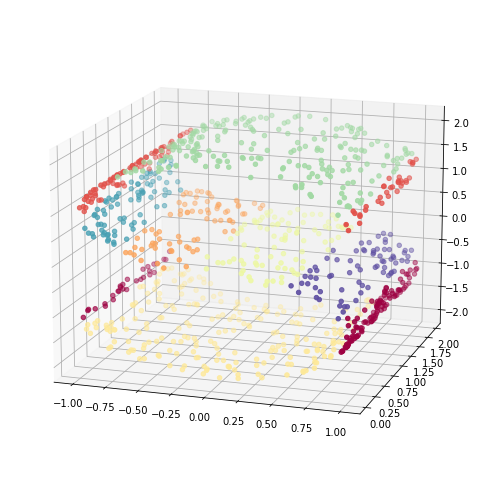

In [15]:
N = 1000
X, color = make_s_curve(N, random_state=seed)

fig = plt.figure(figsize=(50,25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y_sc, cmap=my_cmap)
ax.view_init(15, -72)

c:\users\jose\appdata\local\programs\python\python37\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


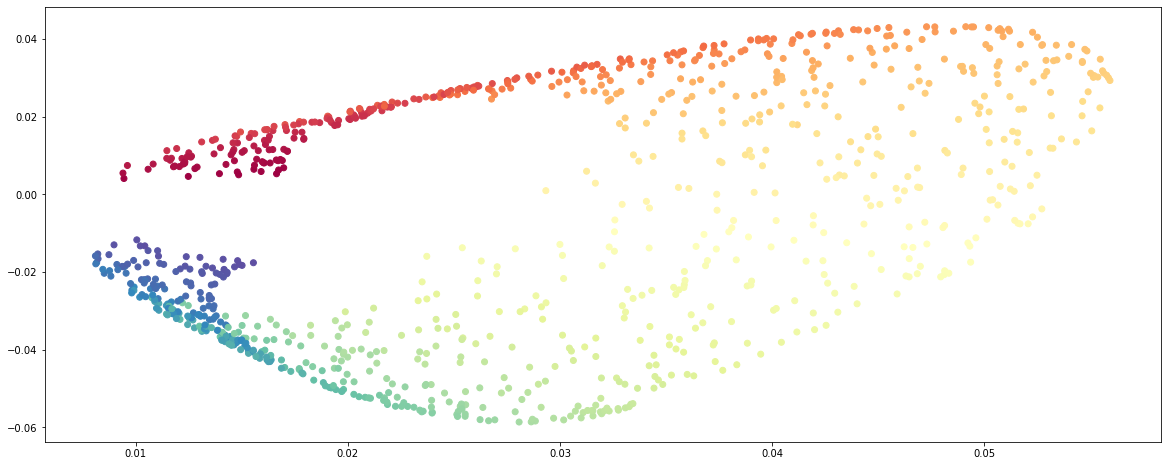

In [16]:
L = sc.affinity_matrix_
lamb, v = np.linalg.eig(L)
id_lamb = lamb.argsort()[::-1]
v_ord = v[:, id_lamb]

X_sc = v_ord[:, :2]

_ = plt.scatter(X_sc[:,0], X_sc[:,1], c=color, cmap=my_cmap)

## LLE

<div class="tqst">

* Define a proper embedding using LLE.

</div>

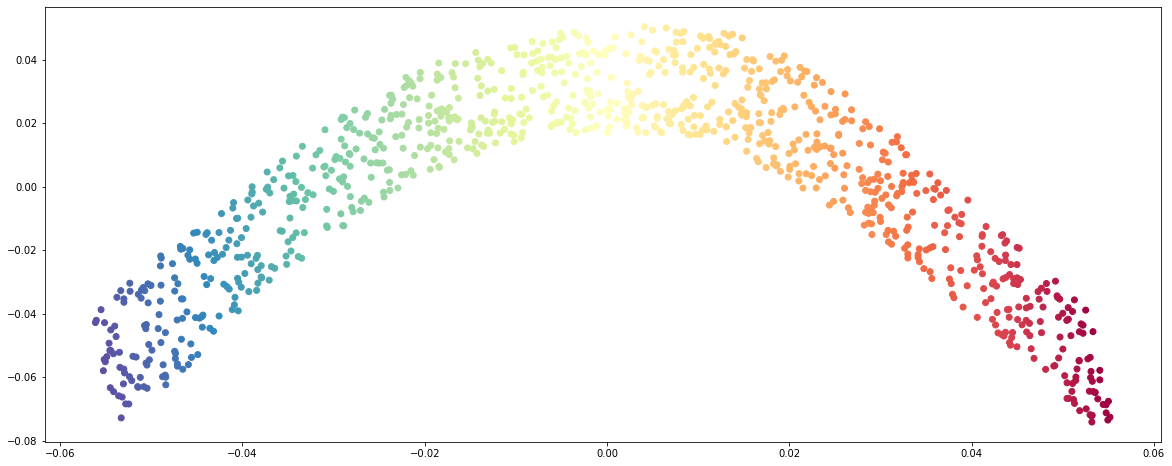

In [160]:
LLE = LocallyLinearEmbedding(
    n_components=2,
    n_neighbors=14,
)

X_lle = LLE.fit_transform(X)

_ = plt.scatter(X_lle[:,0], X_lle[:,1], c=color, cmap=my_cmap)

## LE

<div class="tqst">

* Define a proper embedding using LE.

</div>

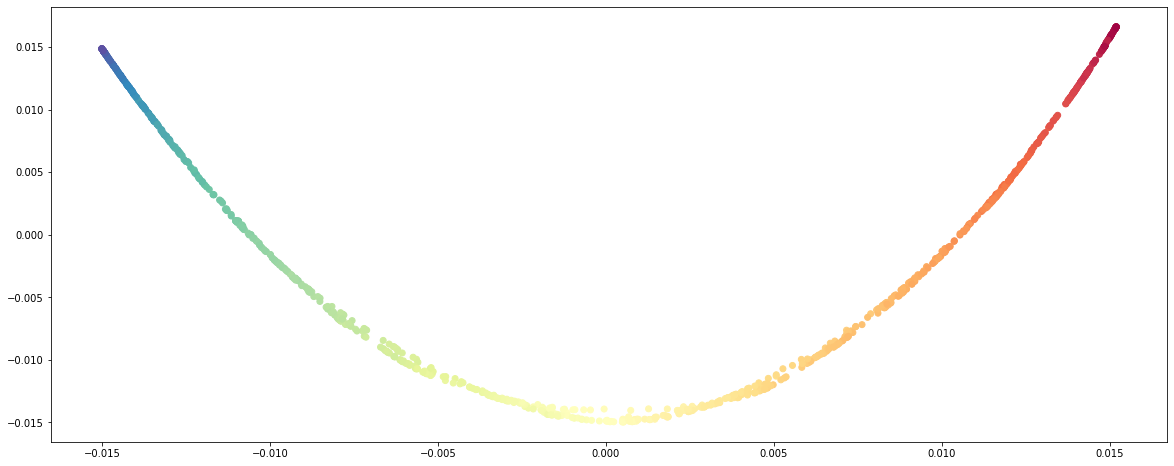

In [152]:
LE = SpectralEmbedding(
    n_components=2,
    affinity="nearest_neighbors",
    n_neighbors=10
)

X_le = LE.fit_transform(X)

_ = plt.scatter(X_le[:,0], X_le[:,1], c=color, cmap=my_cmap)